In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir("C:/Users/Elijah/Desktop/results-including-0-scores")
data = pd.read_csv("GrowingStairs.csv")

In [5]:
data = data.drop(data.columns[[0,1]], axis=1)

In [6]:
data

,Year,Semester,Quiz #,Student ID,Coding Problem,Score,Maximum,Distance,Percent,Distance Z-score,Distance Min-Max Scaled
0,2016,fall,quiz03,s1357ef63,GrowingStairs,10,10,87.451477,0.679875,0.734210,0.429098
1,2016,fall,quiz03,s15791c4c,GrowingStairs,9,10,89.282700,0.694112,0.837336,0.454487
2,2016,fall,quiz03,s1baeda84,GrowingStairs,10,10,75.860759,0.589765,0.081473,0.268398
3,2016,fall,quiz03,s1cedb8ee,GrowingStairs,10,10,61.616034,0.479022,-0.720726,0.070902
4,2016,fall,quiz03,s1ddb3f19,GrowingStairs,10,10,112.367089,0.873577,2.137345,0.774541
...,...,...,...,...,...,...,...,...,...,...,...
233,2018,fall,quiz03,se8b7cf3a,GrowingStairs,10,10,63.012658,0.489880,-0.642074,0.090266
234,2018,fall,quiz03,see34afd4,GrowingStairs,10,10,64.713080,0.503100,-0.546314,0.113841
235,2018,fall,quiz03,sf39b2f6f,GrowingStairs,9,10,90.316456,0.702149,0.895553,0.468819
236,2018,fall,quiz03,sf46256b6,GrowingStairs,10,10,99.004219,0.769690,1.384809,0.589271


C:\Users\Elijah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


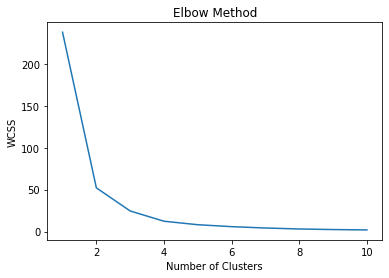

In [8]:
X = data.loc[:, ['Distance Z-score']]

# use elbow mwthod to find optimal number of clusters
from sklearn.cluster import KMeans

# with in cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters =i, init="k-means++", max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss);
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

It seems that the last big difference in WCSS for the GrowingStairs programs is between 3 and 4. I will choose 3 clusters based off of this information.

In [10]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=1000, n_init=10)
y_pred = kmeans.fit_predict(X)

In [12]:
#plot the scatters
'''
X[y_pred==0] - will list records which belongs to cluster 0
output:
       Qty  UnitPrice
1     1911       3.39
'''
plt.scatter(X[y_pred == 0].iloc[:, 0], X[y_pred == 0].iloc[:, 1], s=5, c="red")
plt.scatter(X[y_pred == 1].iloc[:, 0], X[y_pred == 1].iloc[:, 1], s=5, c="green")
plt.scatter(X[y_pred == 2].iloc[:, 0], X[y_pred == 2].iloc[:, 1], s=5, c="blue")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="black", marker="*")# I limit the y value to get rid of the outlier records
plt.ylim([0,20])
plt.xlabel("Sold Quantity")
plt.ylabel("Unit Price")
plt.show()

IndexError: single positional indexer is out-of-bounds